# Beta distribution

## What is beta distribution?

A beta distribution is a type of continuous probability distribution defined by two positive parameters.

The probability density function is

$$
f(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)} \ where \ \alpha,\beta>0, \ \ 0 \leq x \leq 1
$$

$B(x,y)$ is a beta function defined by the following.

$$
B(x,y)=\int_{0}^{1} t^{x-1}(1-t)^{y-1} dt \ where \ x,y > 0
$$


## Order statistic

The $i$th order statistics are to get $i$th-smallest value. Suppose we have four numbers $6, 9, 3, 8$. The order statistics are denoted by the following.

$$
x_{(1)}=3, \ x_{(2)}=6, \ x_{(3)}=8, \ x_{(4)}=9
$$

In terms of the probability of order statistics, the probability density function of the order statistic sampled from a uniform distribution $U_{(i)}$ is

$$
f_{U_{(i)}}(u) = \frac{n!}{(i-1)!(n-i)!}u^{i-1}(1-u)^{j-1} \ where \ n=i+j-1, \ u \sim U(0,1)
$$

Given the relationship between beta function and gamma function and factorial,

$$
B(\alpha,\beta)=\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)} \ \ \ \ \Gamma(n+1)=n!
$$

the factorial block of the probability density function is transformed as below.

$$
\frac{n!}{(i-1)!(n-1)!} = \frac{n!}{(j-1)!(i-1)!} = \frac{\Gamma(n+1)}{\Gamma(i)\Gamma(j)} = \frac{\Gamma(i+j)}{\Gamma(i)\Gamma(j)} = \frac{1}{B(i,j)}
$$

Then,

$$
f_{U_{(i)}}(u) = \frac{1}{B(i,j)}u^{i-1}(1-u)^{j-1} \ where \ n=i+j-1, \ u \sim U(0,1)
$$

So, a beta distribution is a probability density function of the $i$th order statistics from a uniform distribution!

## Graphical understanding
### Beta distributions

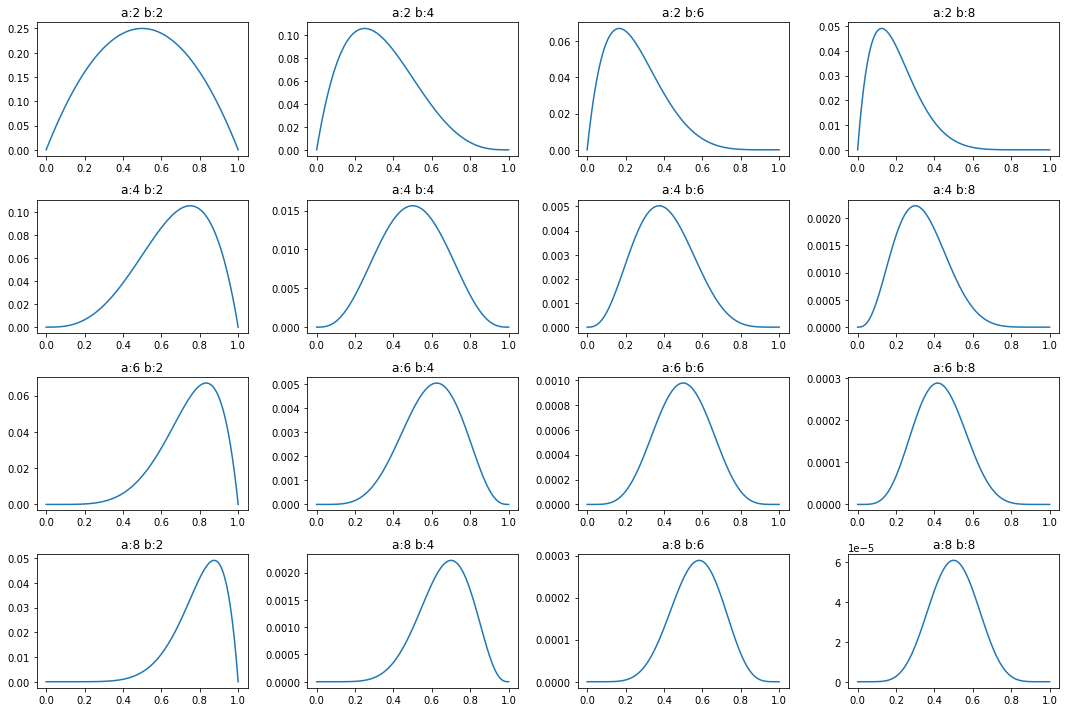

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

p = np.linspace(0, 1, 100)

a_list = [2, 4, 6, 8]
b_list = [2, 4, 6, 8]

_, axs = plt.subplots(len(a_list), len(b_list), figsize=(15, 10))
for ia, a in enumerate(a_list):
    for ib, b in enumerate(b_list):
        f = p**(a-1) * (1-p)**(b-1)
        axs[ia, ib].plot(p, f)
        axs[ia, ib].set_title('a:{} b:{}'.format(a, b))

plt.tight_layout()
plt.show()

### Probabilities of order statistics

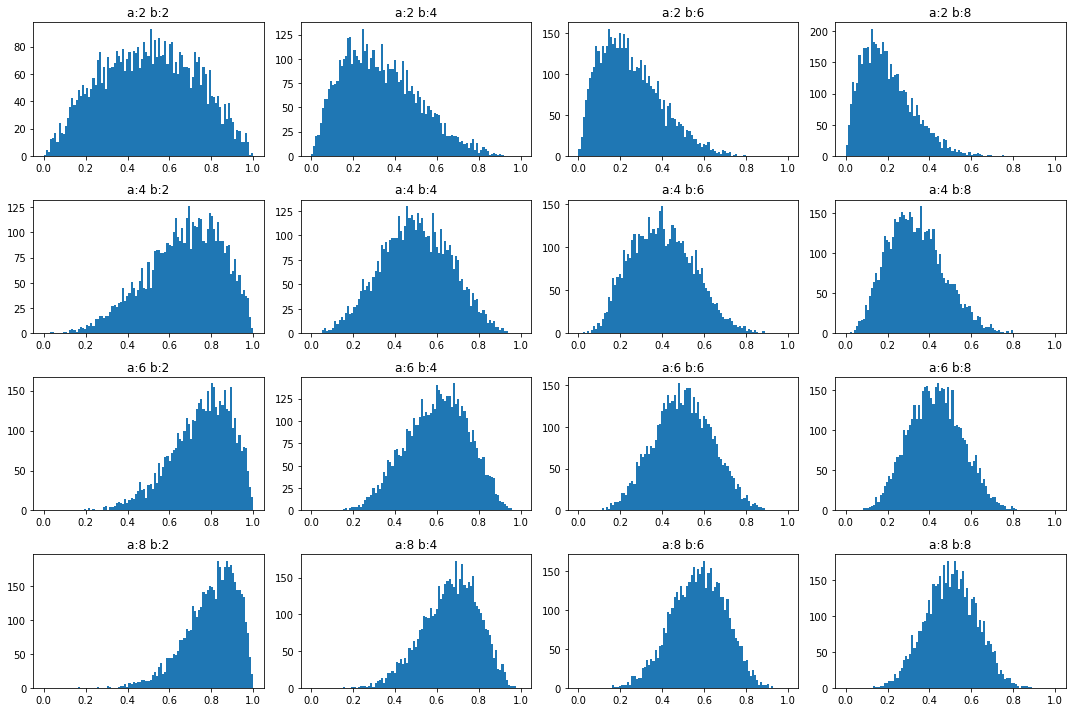

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np

trial = 5000

p = np.linspace(0, 1, 100)

a_list = [2, 4, 6, 8]
b_list = [2, 4, 6, 8]

_, axs = plt.subplots(len(a_list), len(b_list), figsize=(15, 10))
for ia, a in enumerate(a_list):
    for ib, b in enumerate(b_list):
        n = a + b - 1
        r = [ np.sort(np.random.rand(n))[a-1] for _ in range(trial) ]
        axs[ia, ib].hist(r, bins=np.linspace(0, 1, 100))
        axs[ia, ib].set_title('a:{} b:{}'.format(a, b))

plt.tight_layout()
plt.show()

### Overlay those graphs

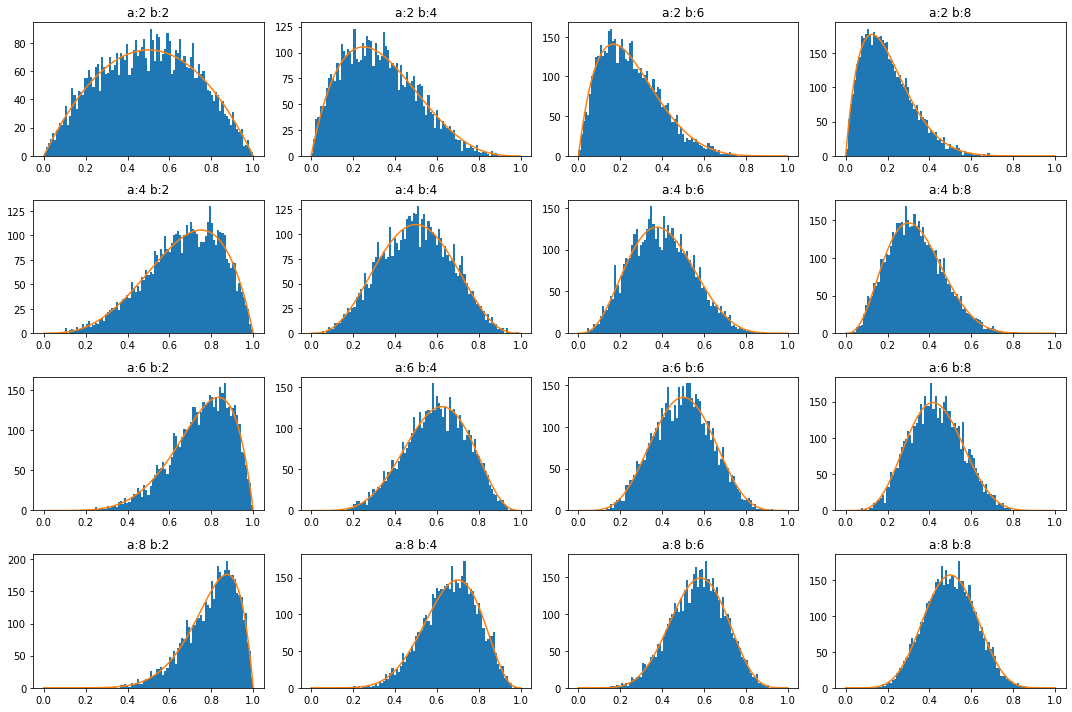

In [3]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.special import beta

trial = 5000

p = np.linspace(0, 1, 100)

a_list = [2, 4, 6, 8]
b_list = [2, 4, 6, 8]

_, axs = plt.subplots(len(a_list), len(b_list), figsize=(15, 10))
for ia, a in enumerate(a_list):
    for ib, b in enumerate(b_list):
        n = a + b - 1
        r = [ np.sort(np.random.rand(n))[a-1] for _ in range(trial) ]
        axs[ia, ib].hist(r, bins=np.linspace(0, 1, 100))
        f = (p**(a-1) * (1-p)**(b-1)) / beta(a, b)
        axs[ia, ib].plot(p, f*trial/100)
        axs[ia, ib].set_title('a:{} b:{}'.format(a, b))

plt.tight_layout()
plt.show()